In [104]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from figure_gif2 import figure_gif
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [108]:
def diffusion_update(diff_grid,grid,dt,h):
    D = 3.51*10**(-1)
    
    for i in range(grid):
        for j in range(grid):
            if i==0 or j==0 or i==grid-1 or j==grid-1:
                diff_grid[i,j]=0 #set lactate concentration at boundaries to zero
            else:
                diff_grid[i,j] = ((D*dt*(diff_grid[i+1,j] + diff_grid[i,j-1] + diff_grid[i,j+1] + diff_grid[i-1,j] - 4*diff_grid[i,j]))/h**2) + diff_grid[i,j] #finite difference method
    return diff_grid

In [109]:
def diffusion_plot(grid,t):
    
    initial_conc=10
    dt=1
    h=1
    
    diff_grid = np.zeros((grid,grid)) #grid with lactate concentrations
    calibrate_colorbar = np.zeros((grid,grid))
    
    diff_grid[round(grid/2),round(grid/2)]=initial_conc
    calibrate_colorbar[1,1]=initial_conc

    
    anim=figure_gif(figsize=(7.5,7.5))
    ax=anim.add_subplot(1,1,1)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    
    calibrate_colorbar=ax.pcolormesh(diff_grid)
    plt.colorbar(calibrate_colorbar, cax=cax, orientation='vertical')
    
    for i in range(0,t+1,dt): 
        ax.clear() 
        diff_plot=ax.pcolormesh(diff_grid)
        ax.set_title(f'generation number = {i:.2f}')
        diff_grid = diffusion_update(diff_grid,grid,dt,h)
        #diff_grid[round(grid/2),round(grid/2)]=initial_conc
        anim.add_frame()
        
    anim.show()
    


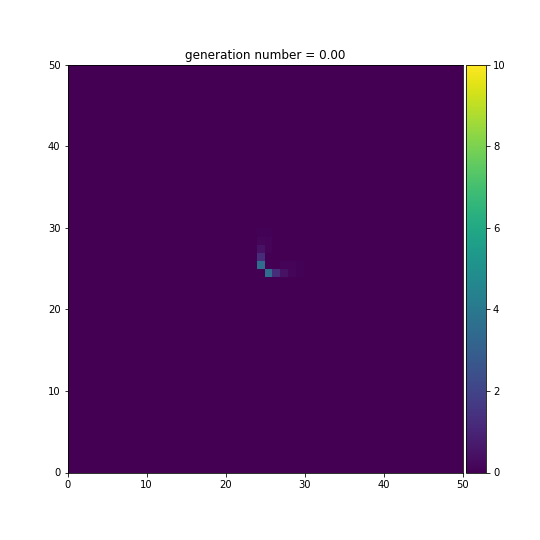
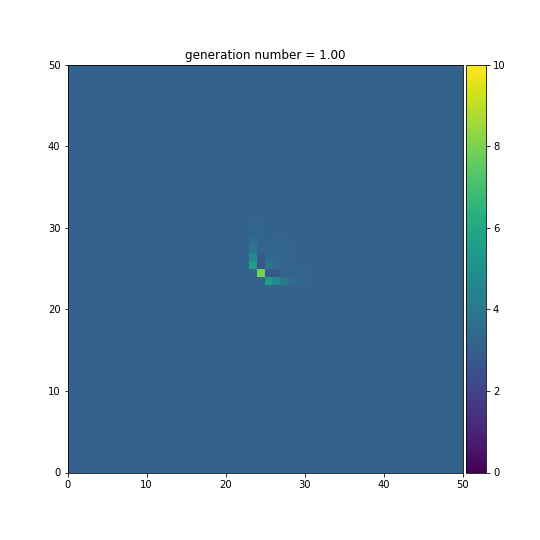
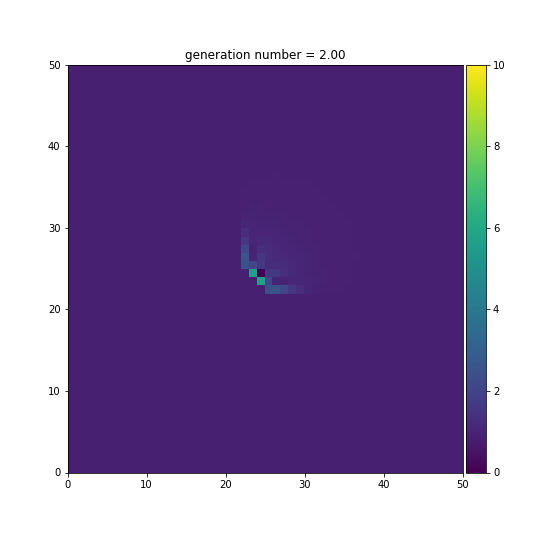
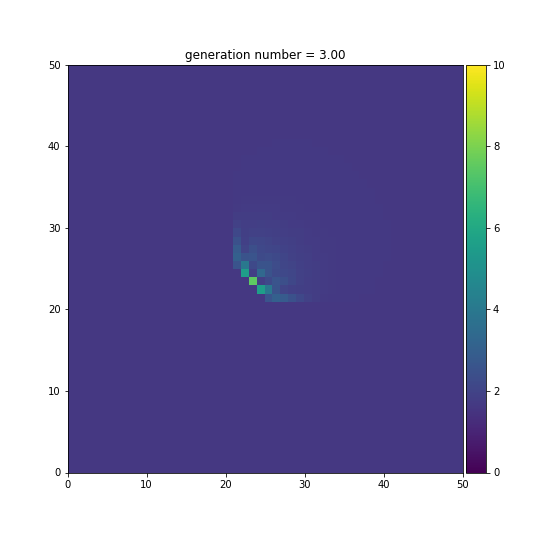
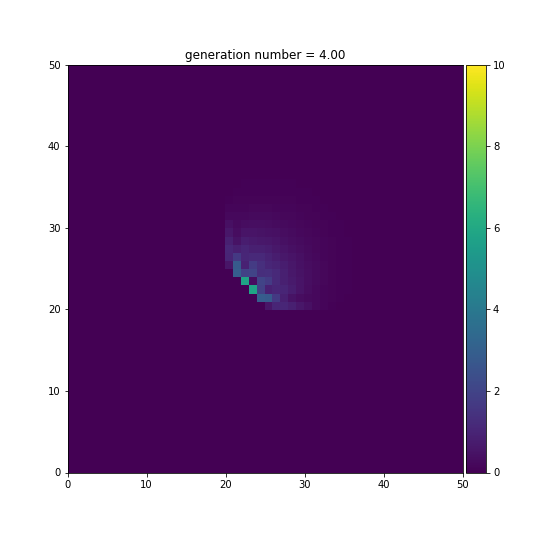
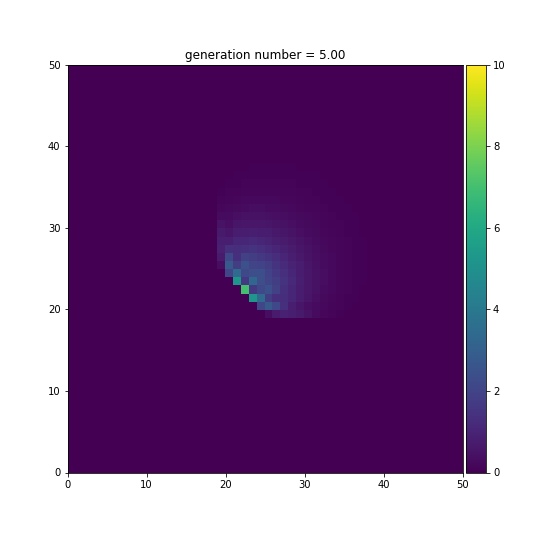
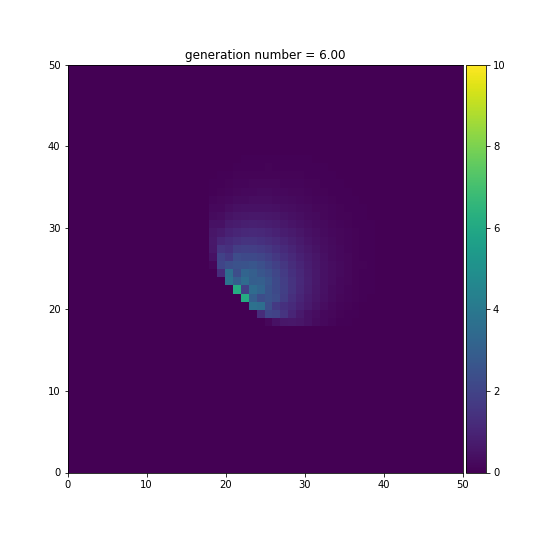
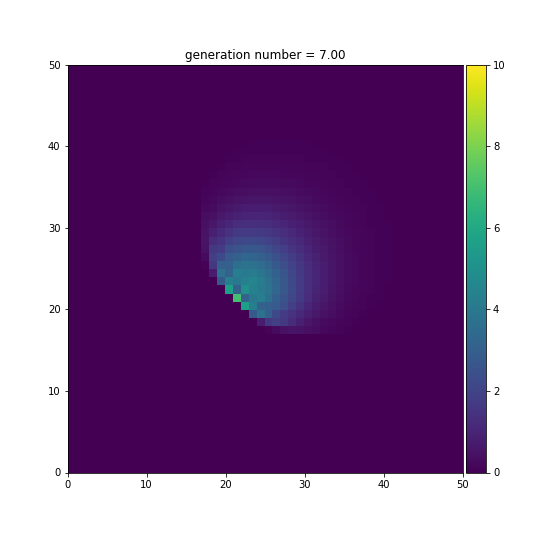
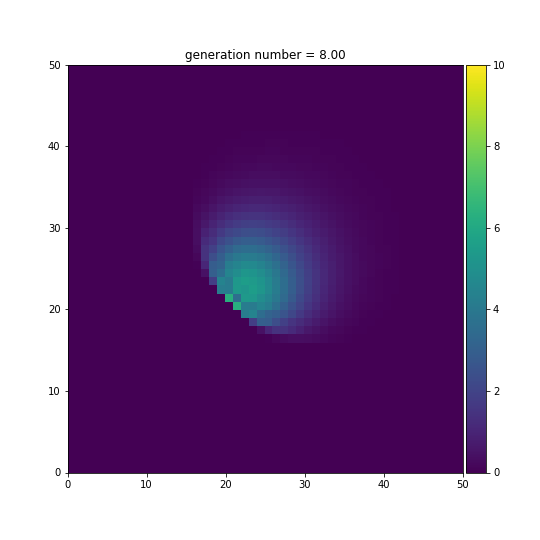
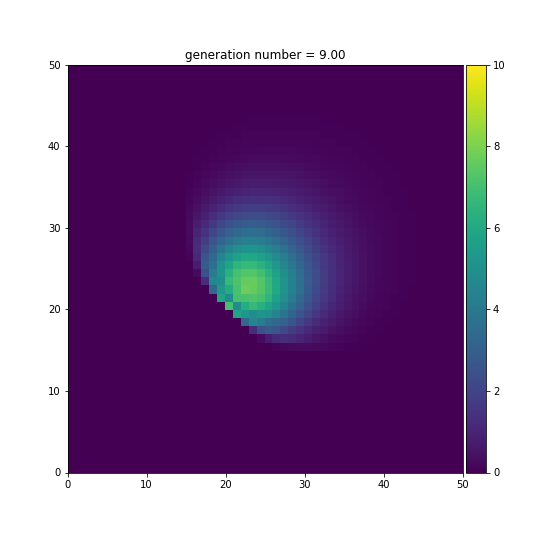
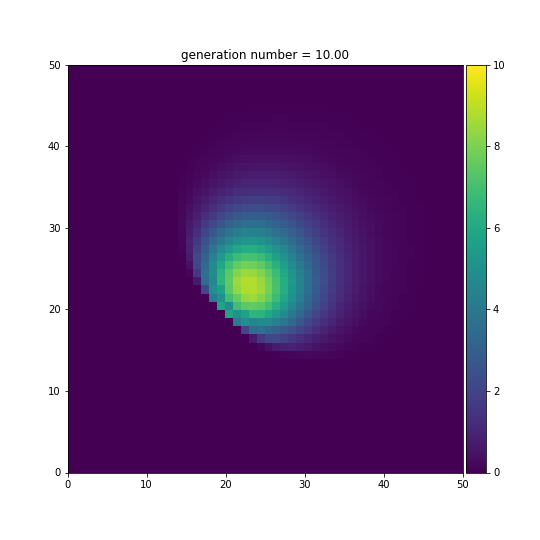
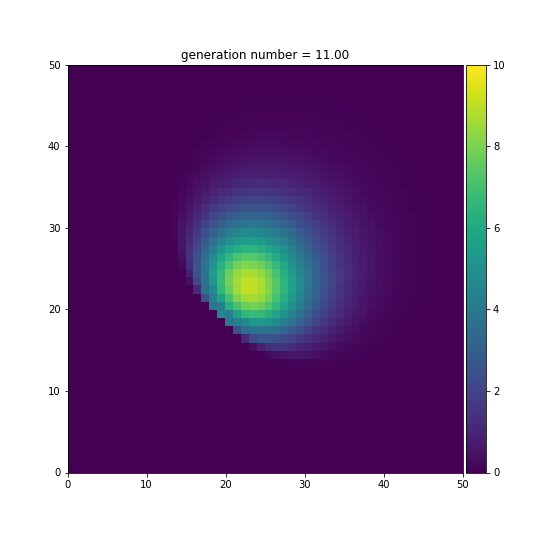
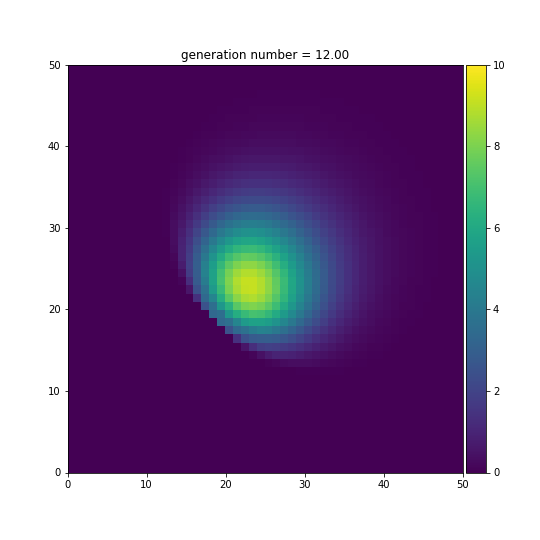
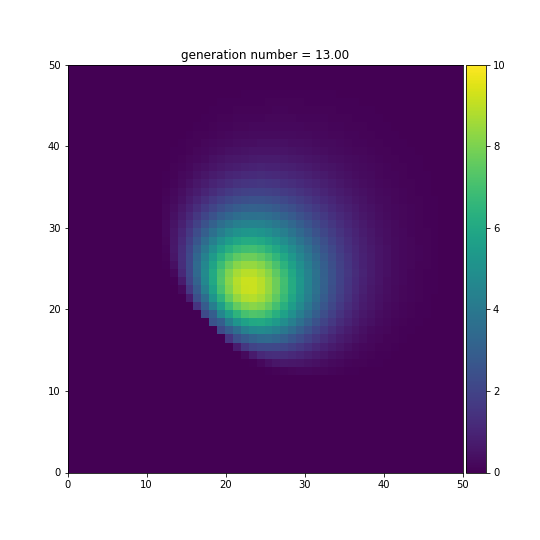
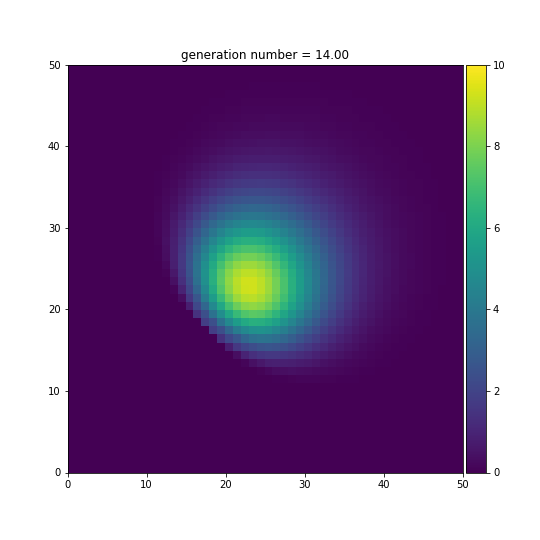
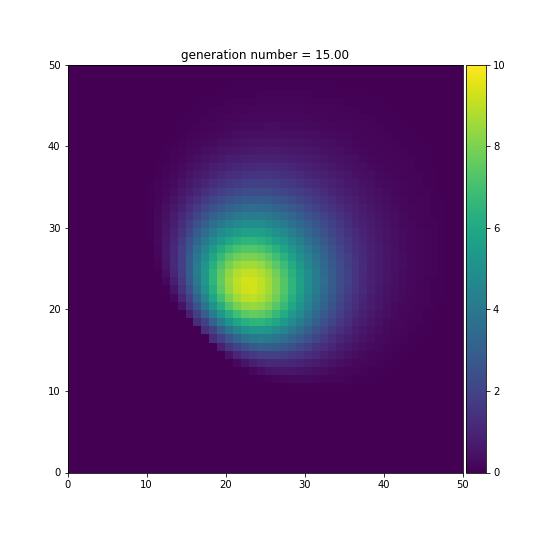
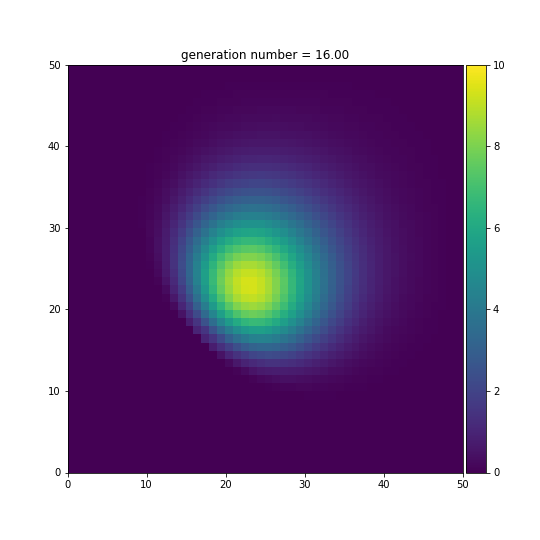
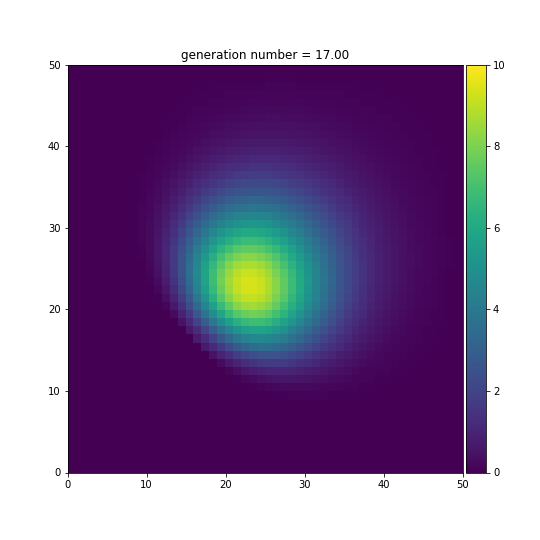
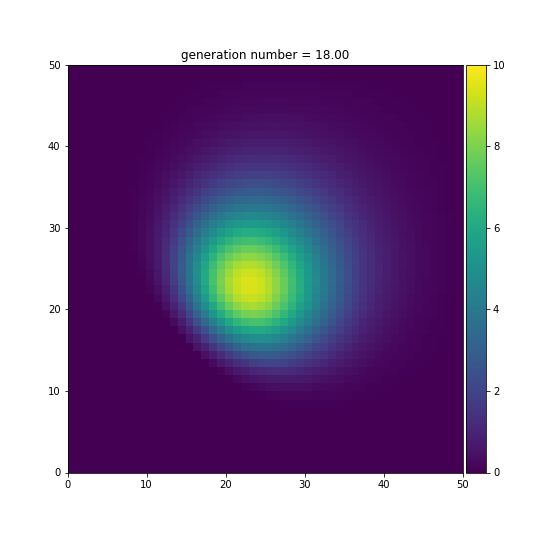
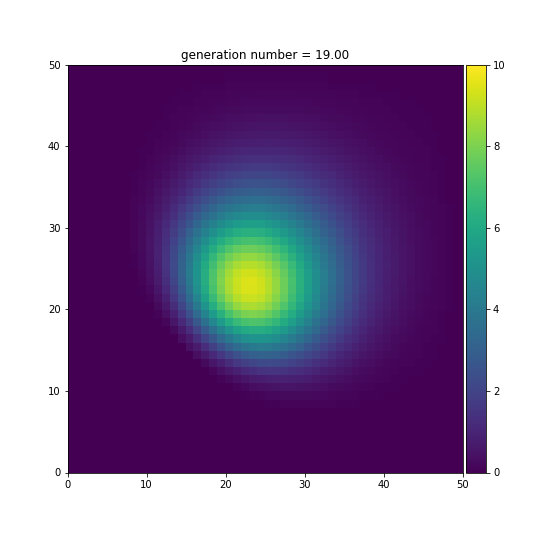
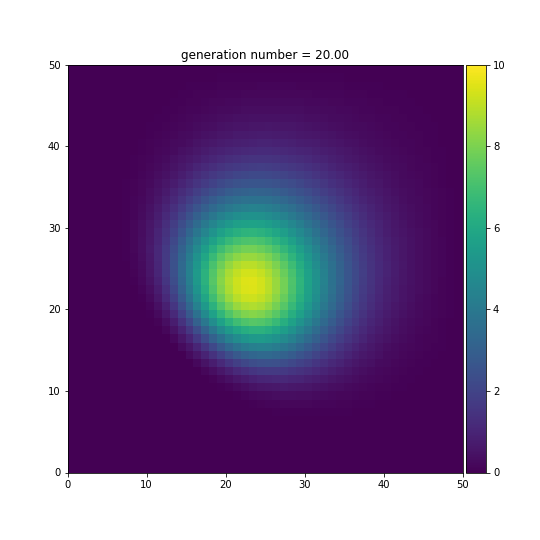
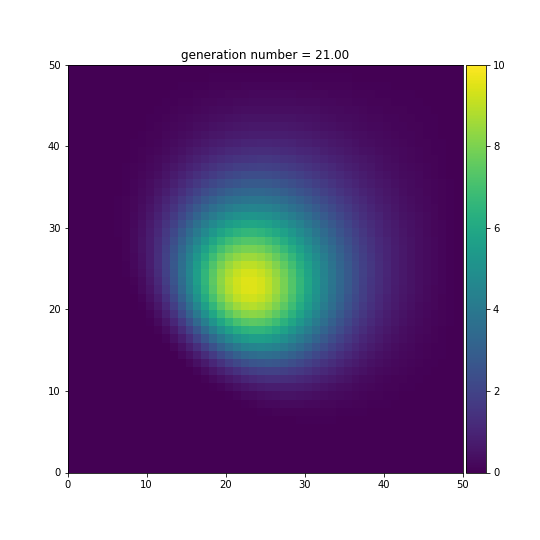
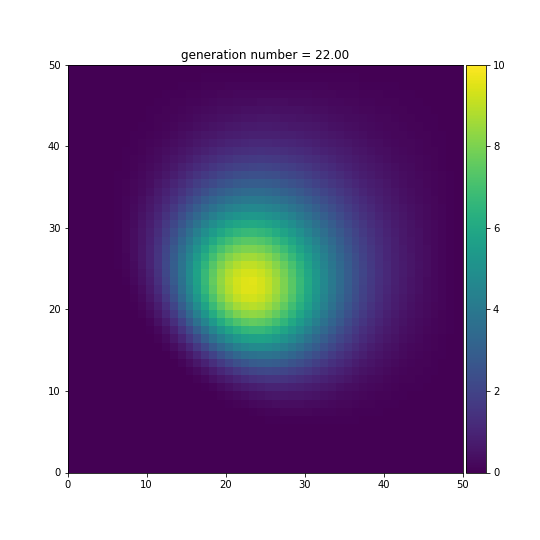
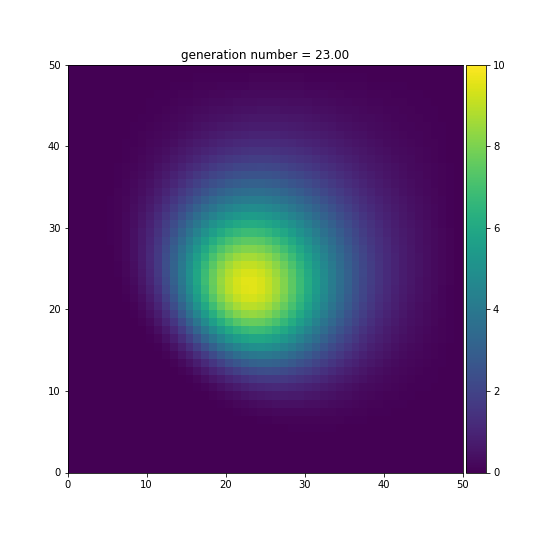
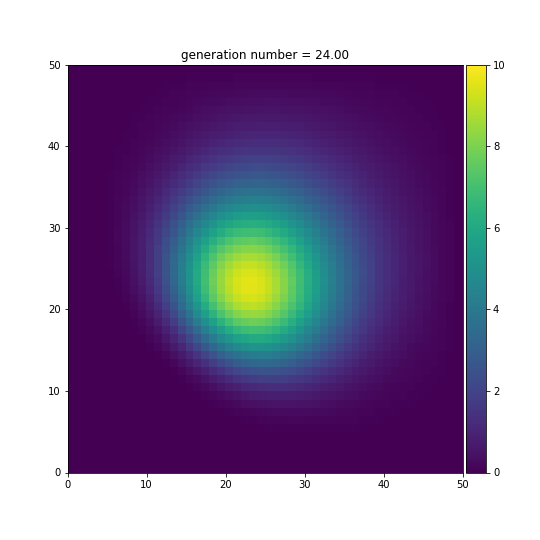
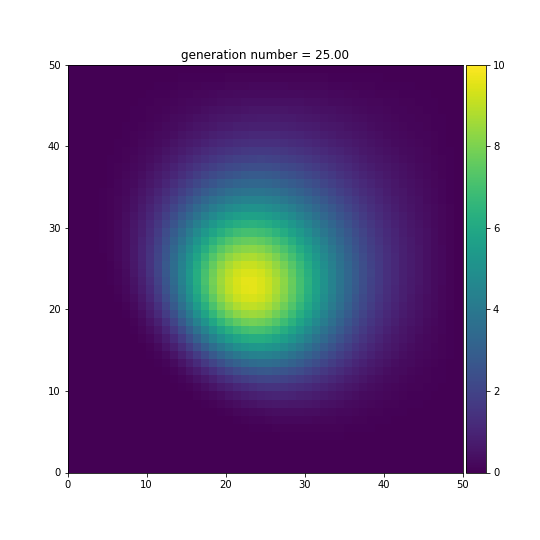
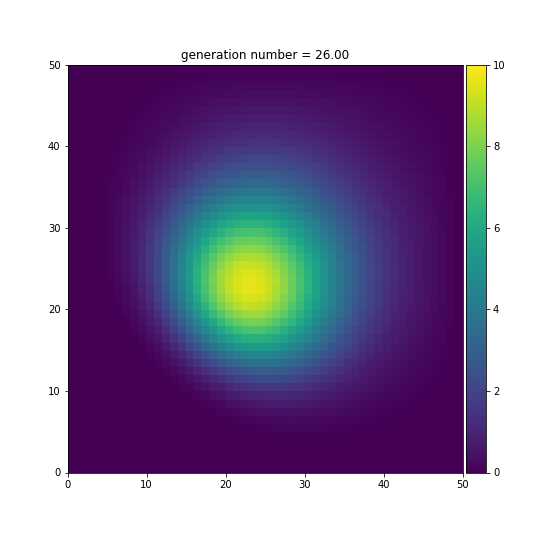
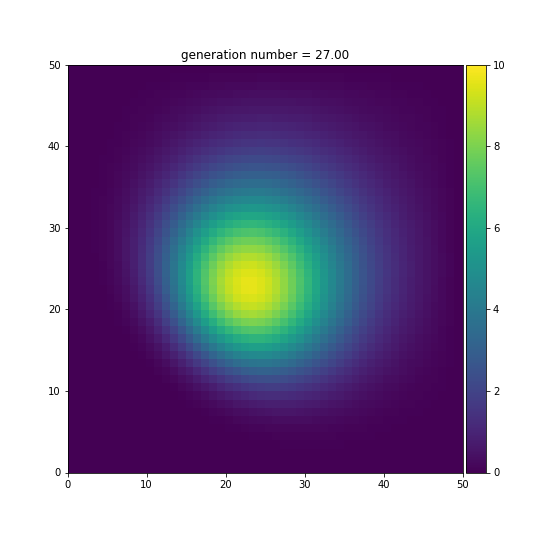
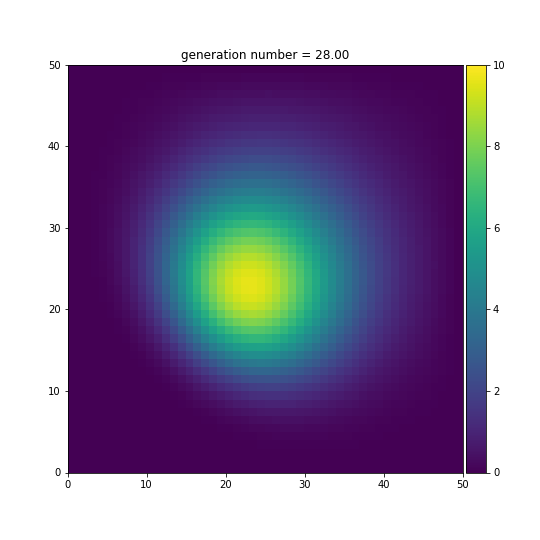
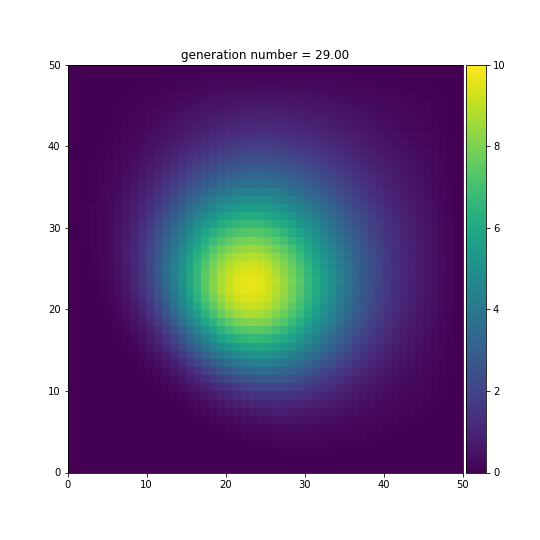
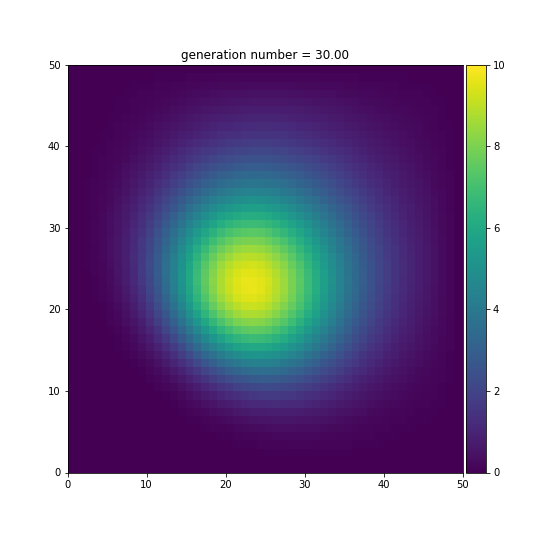
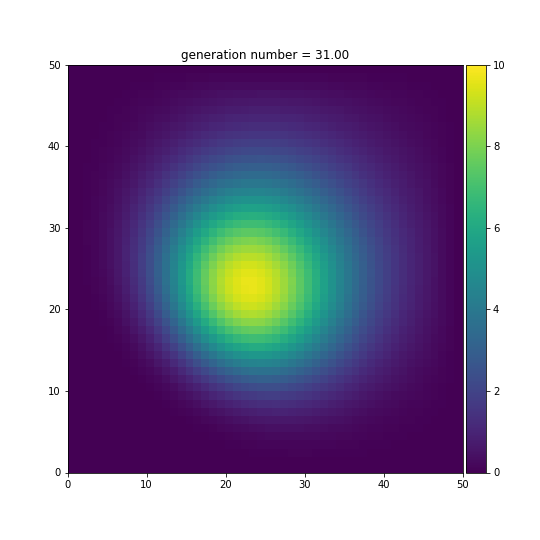
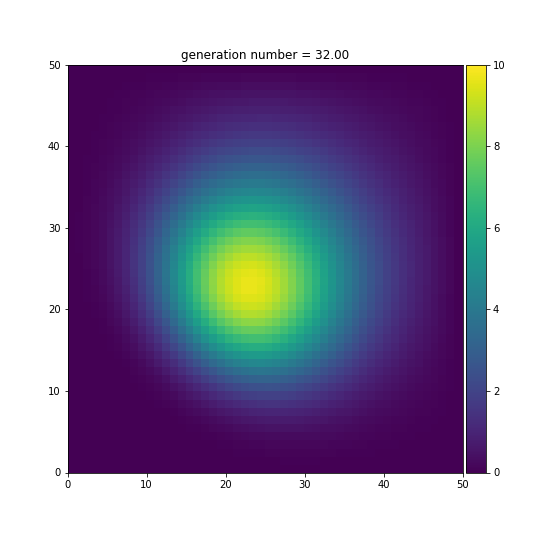
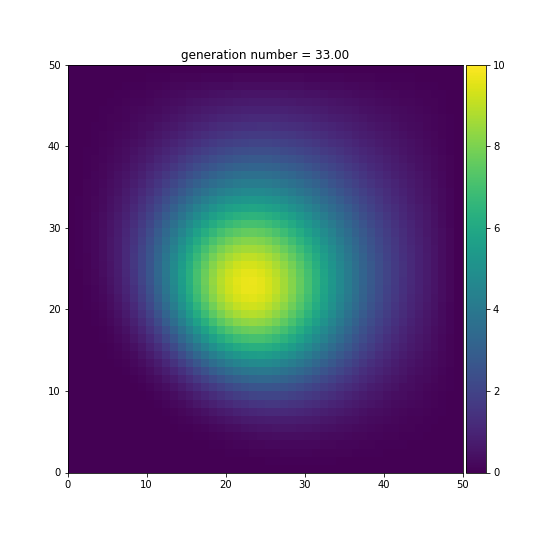
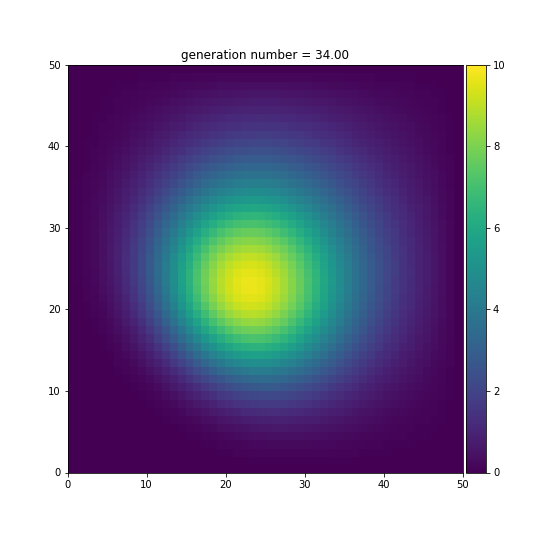
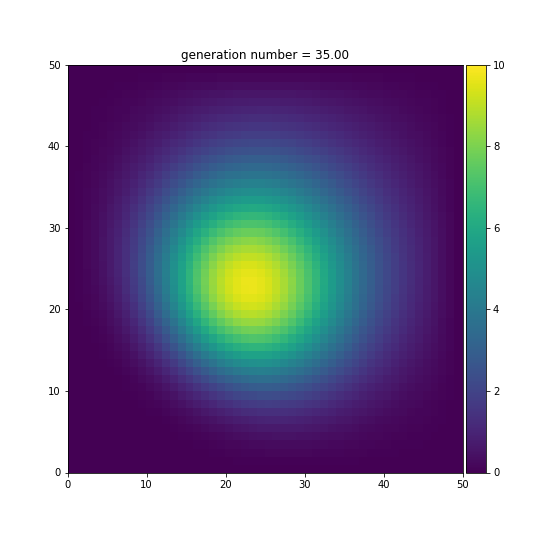
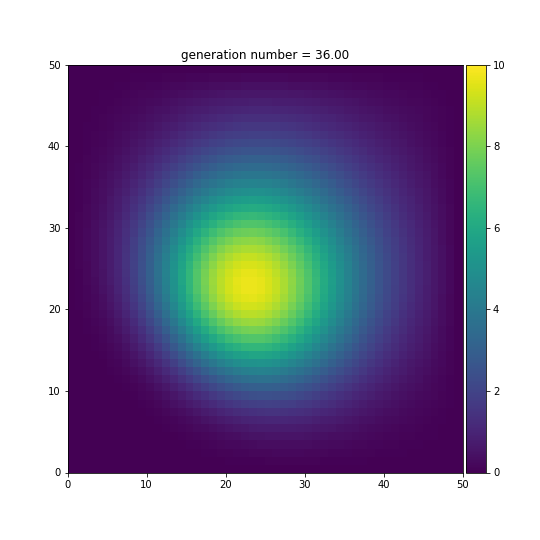
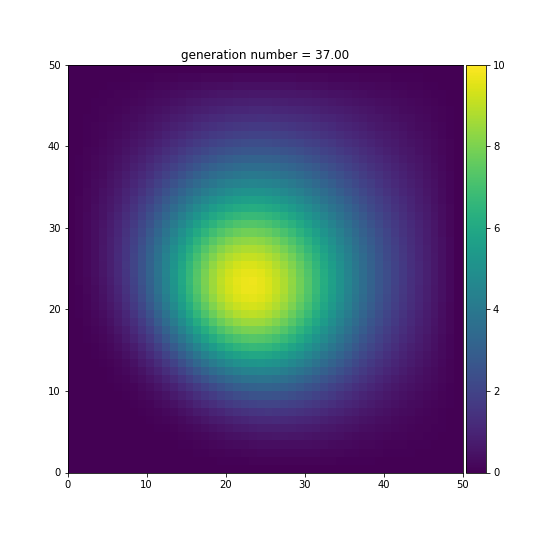
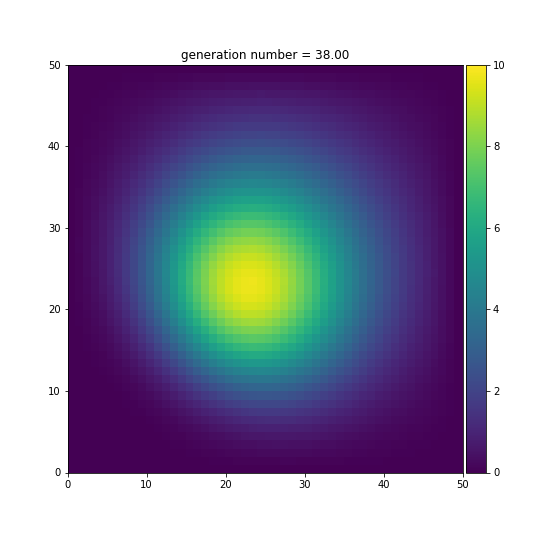
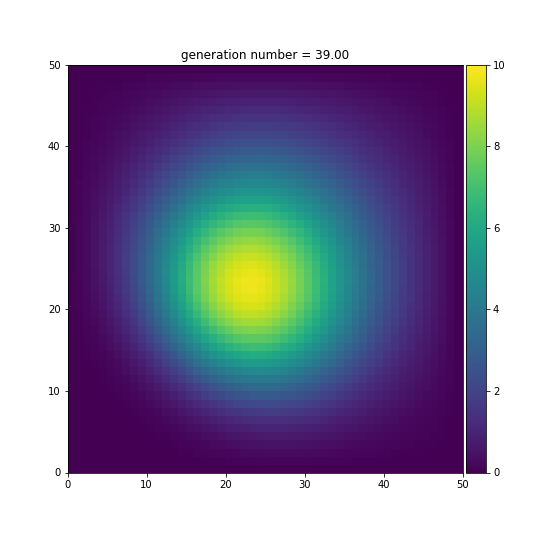
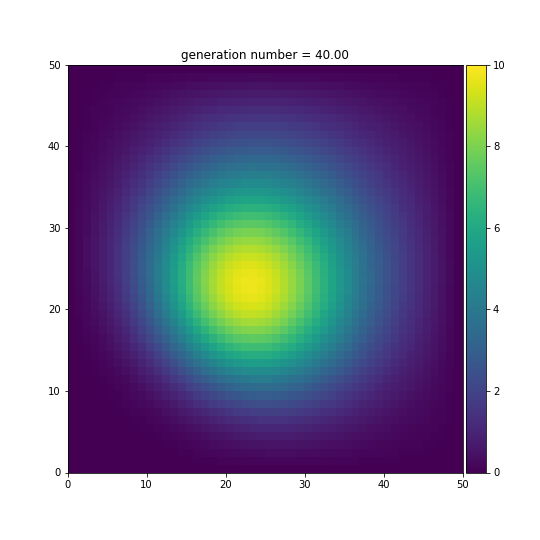
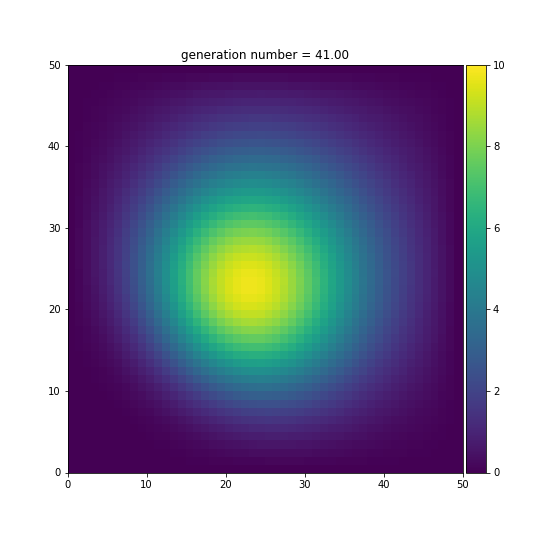
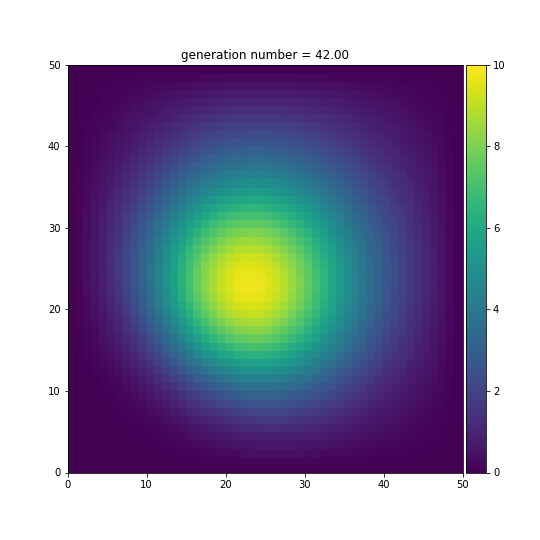
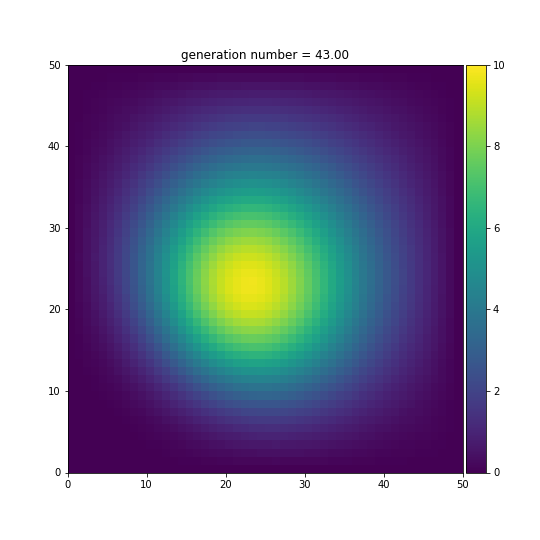
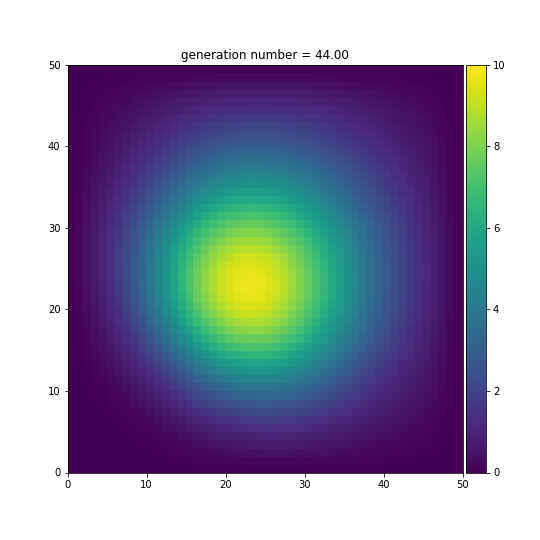
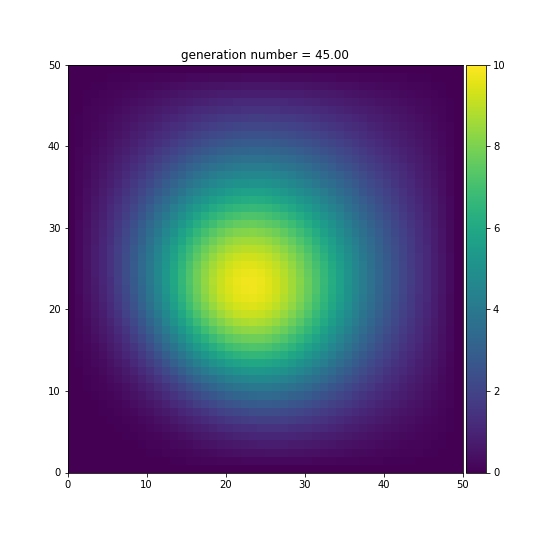
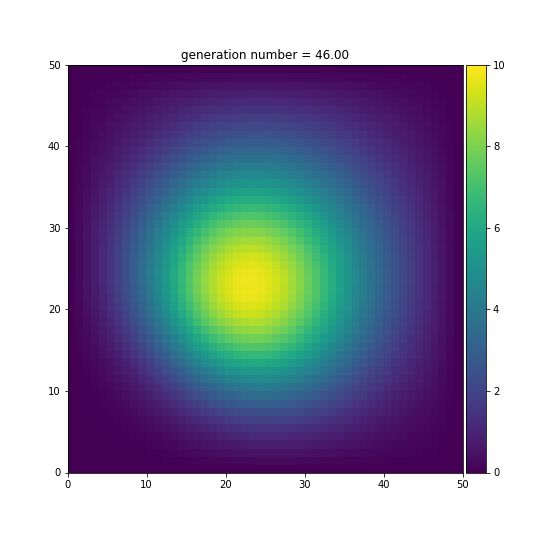
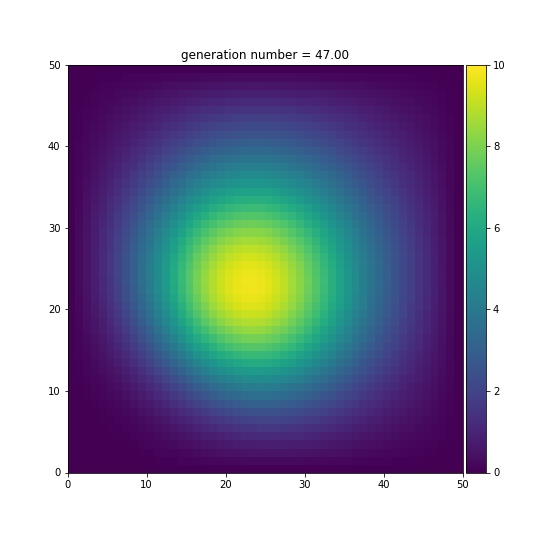
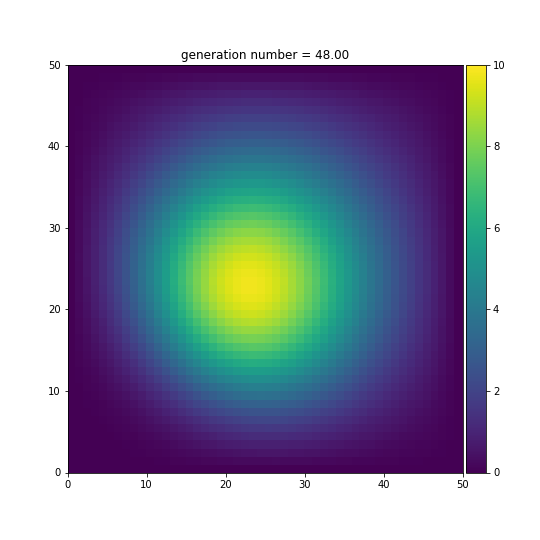
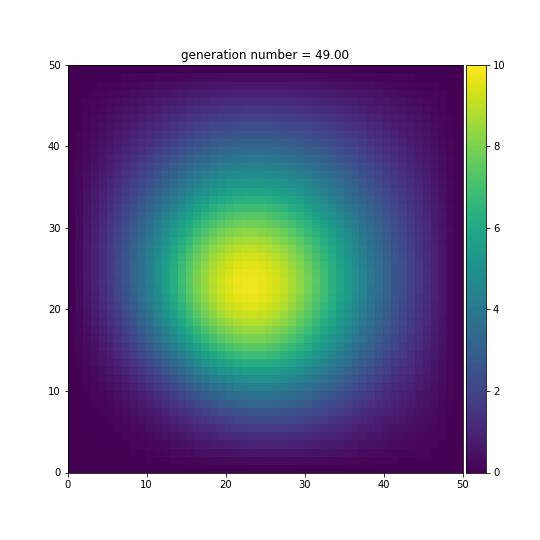

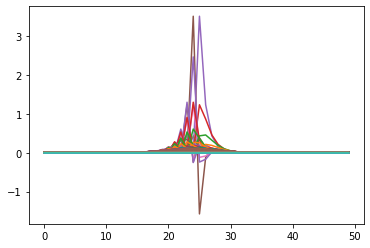

In [110]:
diffusion_plot(50,50)